In [1]:
!pip install blis

In [2]:
!pip install -U spacy


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Word Tokenization

In [13]:
import nltk
import spacy

text = "Hello! How are you? I am learning NLP. Welcome to U.S.A. "

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
spacy_tokens = [token.text for token in doc]

print("SpaCy Tokens:", spacy_tokens)


SpaCy Tokens: ['Hello', '!', 'How', 'are', 'you', '?', 'I', 'am', 'learning', 'NLP', '.', 'Welcome', 'to', 'U.S.A.']


### Stop word removal 

In [4]:
spacy_stopwords = [token.text for token in doc if not token.is_stop]

print("SpaCy Filtered Words:", spacy_stopwords)


SpaCy Filtered Words: ['Hello', '!', '?', 'learning', 'NLP', '.', 'Welcome', 'U.S.A.']


### Lemmatization

In [5]:
lemmatized_words = [token.lemma_ for token in doc]

print("Lemmatized Words:", lemmatized_words)


Lemmatized Words: ['hello', '!', 'how', 'be', 'you', '?', 'I', 'be', 'learn', 'NLP', '.', 'welcome', 'to', 'U.S.A.']


### Lower casr and Remove Punctuations

In [6]:
import re

text = "Hello!! This is NLP 101. Visit https://example.com"
cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
lower_text = cleaned_text.lower()

print("Cleaned Text:", lower_text)


Cleaned Text: hello this is nlp  visit httpsexamplecom


### parts of Speech 

In [7]:
for token in doc:
    print(f"{token.text} --> {token.pos_}")


Hello --> INTJ
! --> PUNCT
How --> SCONJ
are --> AUX
you --> PRON
? --> PUNCT
I --> PRON
am --> AUX
learning --> VERB
NLP --> PROPN
. --> PUNCT
Welcome --> VERB
to --> ADP
U.S.A. --> PROPN


### NER

In [8]:
for ent in doc.ents:
    print(f"{ent.text} --> {ent.label_}")


NLP --> ORG
U.S.A. --> GPE


### Word2Vec Embeddings

In [9]:
from gensim.models import Word2Vec
from gensim.test.utils import common_texts


model = Word2Vec(sentences=common_texts, vector_size=2, window=5, min_count=1, workers=4)


#### Embeddings for a word

In [10]:
print("Vector for 'computer':", model.wv['computer'])

Vector for 'computer': [-0.41438133 -0.4725784 ]


#### Most similar words

In [11]:
print("Most similar words to 'computer':", model.wv.most_similar('eps'))

Most similar words to 'computer': [('human', 0.9500903487205505), ('survey', 0.8592973351478577), ('interface', 0.6886723041534424), ('user', 0.40688371658325195), ('graph', 0.30556371808052063), ('computer', -0.4925518035888672), ('trees', -0.6540318727493286), ('minors', -0.661042332649231), ('time', -0.724507749080658), ('response', -0.8459388613700867)]


#### Visualizing closest words

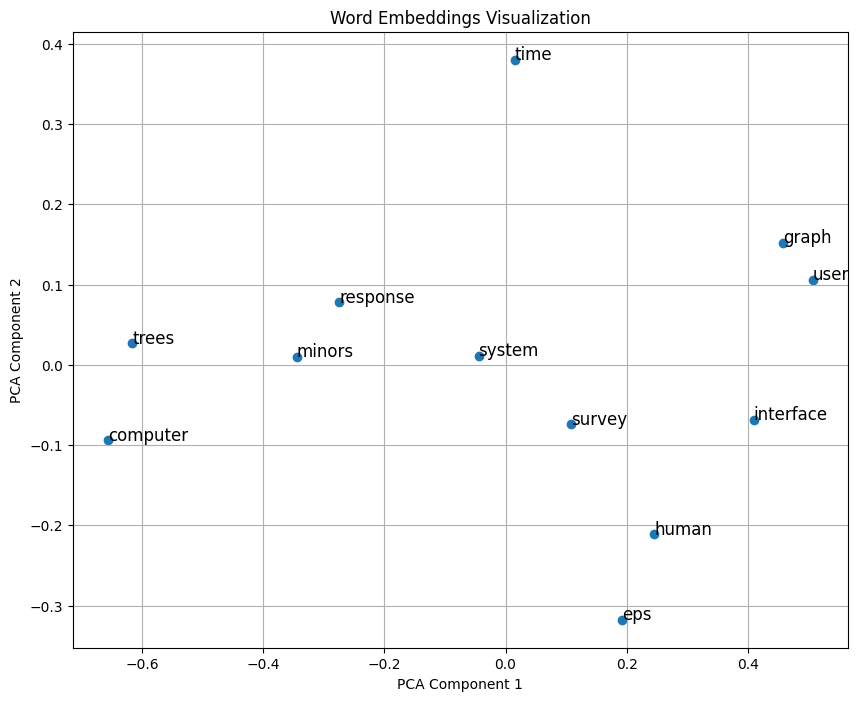

In [12]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.decomposition import PCA


word_vectors = model.wv[model.wv.index_to_key]  # Get the word vectors
pca = PCA(n_components=2)  # Initialize PCA
result = pca.fit_transform(word_vectors)  # Fit and transform the word vectors


plt.figure(figsize=(10, 8))
plt.scatter(result[:, 0], result[:, 1])

                
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=12)

plt.title("Word Embeddings Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid()
plt.show()
